In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#importing random forest and XgB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negative matrix Factorization
from sklearn.decomposition import NMF


from sklearn.naive_bayes import MultinomialNB

#principal component analysis
from sklearn.decomposition import PCA


#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

#LDA
import pyLDAvis.lda_model
pyLDAvis.lda_model.prepare
from sklearn.decomposition import LatentDirichletAllocation


import gensim
from gensim import corpora
!pip install shap
import shap 

#download small spacy model
# !python -m spacy download en_core_web_sm
# import spacy

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vipulpandey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vipulpandey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vipulpandey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/vipulpandey/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vipulpandey/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=20259) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [2]:
hotel_df=pd.read_csv('/Users/vipulpandey/Documents/ZomatoRestaurantClustering/data/Zomato Restaurant names and Metadata.csv')
review_df=pd.read_csv('/Users/vipulpandey/Documents/ZomatoRestaurantClustering/data/Zomato Restaurant reviews.csv')

In [3]:
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [5]:
print(f"shape of hotel_data is {hotel_df.shape}")
print(f"shape of hotel_data is {review_df.shape}")

shape of hotel_data is (105, 6)
shape of hotel_data is (10000, 7)


In [6]:
print('Restaurant Info')
print('\n')
hotel_df.info()
print('='*120)
print('\n')
print('Review Info')
print('\n')
review_df.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)

In [7]:
hotel_df[hotel_df.duplicated()]

,Name,Links,Cost,Collections,Cuisines,Timings


In [8]:
review_df[review_df.duplicated()].count()

Restaurant    36
Reviewer       0
Review         0
Rating         0
Metadata       0
Time           0
Pictures      36
dtype: int64

In [9]:
review_df[review_df.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [10]:
hotel_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [11]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [12]:
hotel_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

Understanding the data

In [13]:
print(f'Features in hotel df are {hotel_df.columns.to_list()}')

Features in hotel df are ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']


In [14]:
print(f'Review in hotel df are {review_df.columns.to_list()}')

Review in hotel df are ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [15]:
hotel_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [16]:
review_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.00,NaN,NaN,NaN,0.75,2.57,0.00,0.00,0.00,0.00,64.00


In [17]:
for i in hotel_df.columns.tolist():
    print("No of unique values in", i, "is", hotel_df[i].nunique())

No of unique values in Name is 105
No of unique values in Links is 105
No of unique values in Cost is 29
No of unique values in Collections is 42
No of unique values in Cuisines is 92
No of unique values in Timings is 77


In [18]:
hotel_df.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [19]:
for i in review_df.columns.tolist():
    print("No of unique values in", i, "is", review_df[i].nunique())

No of unique values in Restaurant is 100
No of unique values in Reviewer is 7446
No of unique values in Review is 9364
No of unique values in Rating is 10
No of unique values in Metadata is 2477
No of unique values in Time is 9782
No of unique values in Pictures is 36


In [20]:
review_df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0


In [21]:
review_df[review_df['Review'].duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
743,Shah Ghouse Spl Shawarma,Satish Gowlikar,delivered on time,5,"6 Reviews , 2 Followers",2/9/2019 19:12,0
797,Shah Ghouse Spl Shawarma,Sadiq,good,5,1 Review,9/4/2018 1:31,0
989,Cream Stone,Yugandhar,good,5,2 Reviews,10/10/2018 23:10,0
990,Cream Stone,Vivek Thakur,excellent service,5,2 Reviews,10/10/2018 22:07,0
1068,Sardarji's Chaats & More,Jayaram Boyina,excellent delivery,5,"17 Reviews , 13 Followers",11/13/2018 14:41,0
...,...,...,...,...,...,...,...
9883,Triptify,Manonit Singh,Good,5,1 Review,7/22/2018 22:27,0
9888,Triptify,Anand Chiruguri,late,2,1 Review,7/17/2018 19:16,0
9890,Triptify,Archit Saxena,fast delivery,5,"1 Review , 1 Follower",7/16/2018 14:54,0
9891,Triptify,Saurabh Kumar,Food was awesome,5,"1 Review , 12 Followers",7/15/2018 16:23,0


In [22]:
hotel=hotel_df.copy()
review=review_df.copy()

In [23]:
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [24]:
# in cost we have commas ,we need to remove them
hotel['Cost']=hotel['Cost'].str.replace(',','').astype(int)

In [25]:
hotel.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [26]:
#top 10 costlier restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][:10]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
97,Zega - Sheraton Hyderabad Hotel,1750
104,Republic Of Noodles - Lemon Tree Hotel,1700
34,Mazzo - Marriott Executive Apartments,1700
90,Arena Eleven,1600
11,Barbeque Nation,1600


In [27]:
#top 5 budget friendly restaurant
hotel.sort_values('Cost', ascending = True)[['Name','Cost']][:5]

,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200


In [28]:
#  finding hotel with same price
hotel_price={}
amount=hotel.Cost.values.tolist()
for price in amount:
    rows=hotel[hotel['Cost']==price]
    hotel_price[price]=rows['Name'].tolist()
same_price=pd.DataFrame.from_dict([hotel_price]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})


In [29]:
same_price

,Cost,Name of Restaurants
0,800,"[Beyond Flavours, Paradise, Shah Ghouse Hotel ..."
1,1300,"[Flechazo, The Lal Street - Bar Exchange, Must..."
2,1200,"[Over The Moon Brew Company, The Glass Onion, ..."
3,1500,"[The Fisherman's Wharf, AB's - Absolute Barbec..."
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba..."
5,300,[Shah Ghouse Spl Shawarma]
6,1000,"[Hyper Local, Tiki Shack, Pista House, La La L..."
7,350,"[Cream Stone, Tempteys, The Old Madras Baking ..."
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P..."
9,1600,"[Barbeque Nation, B-Dubs, Arena Eleven]"


In [30]:
hotel_count=hotel.groupby('Cost')['Name'].count().reset_index().sort_values(by='Cost',ascending=False)
same_price=same_price.merge(hotel_count,on='Cost',how='inner').rename(columns={'Name':'Total_Restaurants'})
same_price.sort_values(by='Total_Restaurants',ascending=False)[:5]

,Cost,Name of Restaurants,Total_Restaurants
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


In [31]:
# max price hotels
same_price.sort_values(by='Cost', ascending=False)[:5]

,Cost,Name of Restaurants,Total_Restaurants
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


In [32]:
cuisine_list = hotel.Cuisines.str.split(', ')

In [33]:
cuisine_dict = {}
for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [34]:
cuisine_dict

{'Chinese': 43,
 'Continental': 21,
 'Kebab': 6,
 'European': 4,
 'South Indian': 9,
 'North Indian': 61,
 'Biryani': 16,
 'Asian': 15,
 'Mediterranean': 5,
 'Desserts': 13,
 'Seafood': 4,
 'Beverages': 5,
 'Goan': 1,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 6,
 'Ice Cream': 2,
 'Street Food': 2,
 'Fast Food': 15,
 'BBQ': 2,
 'Italian': 14,
 'Finger Food': 2,
 'Burger': 5,
 'Japanese': 2,
 'Salad': 5,
 'Sushi': 4,
 'Mexican': 1,
 'Mughlai': 6,
 'Andhra': 6,
 'Bakery': 7,
 'Juices': 1,
 'Arabian': 2,
 'Hyderabadi': 4,
 'Cafe': 6,
 'Spanish': 1,
 'Wraps': 1,
 'Thai': 3,
 'Indonesian': 1,
 'Modern Indian': 2,
 'Momos': 4,
 'Pizza': 1,
 'North Eastern': 1,
 'Mithai': 1,
 'Malaysian': 1}

In [35]:
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'cuisine',0:'Number of Restaurants'})
cuisine_df.sort_values(by='Number of Restaurants',ascending=False)[:5]

,cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [36]:
Collections_value_list = hotel.Collections.dropna().str.split(', ')

In [37]:
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [38]:
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [39]:
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


In [40]:
hotel.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


Reviews

In [41]:
review.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0


In [42]:
review.Rating.value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [43]:
review.loc[review['Rating']=='Like']=0
review['Rating']=review['Rating'].astype(float)
review.loc[review['Rating'] == 0] = review.Rating.median()

In [44]:
review[['Reviewer_total', 'Reviewer_followers']] = review['Metadata'].str.split(',', expand=True)
review['Reviewer_total'] = pd.to_numeric(review['Reviewer_total'].str.split(' ').str[0])
review['Reviewer_followers'] = pd.to_numeric(review['Reviewer_followers'].str.split(' ').str[1])
review['Time'] = pd.to_datetime(review['Time'], errors='coerce')
review['Review_year']=pd.DatetimeIndex(review['Time']).year
review['Review_month']=pd.DatetimeIndex(review['Time']).month
review['Review_date']=pd.DatetimeIndex(review['Time']).hour


In [45]:
review.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_total,Reviewer_followers,Review_year,Review_month,Review_date
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.00,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.00,2.00,2019.00,5.00,15.00


In [46]:
avg_hotel_rating=review.groupby('Restaurant').agg({'Rating':'mean','Reviewer':'count'}).reset_index().rename(columns={'Reviewer':'Total_Reviews'})

In [47]:
avg_hotel_rating

,Restaurant,Rating,Total_Reviews
0,4.00,4.00,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


In [48]:
review.Restaurant.nunique()

101

In [49]:
hotel_not_reviewed=[name for name in hotel.Name.unique().tolist() if name not in review.Restaurant.unique().tolist()]
hotel_not_reviewed

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [50]:
# highest rated restaurants
avg_hotel_rating.sort_values('Rating', ascending=False)[:5]

,Restaurant,Rating,Total_Reviews
4,AB's - Absolute Barbecues,4.88,100
12,B-Dubs,4.81,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
68,Paradise,4.70,100
36,Flechazo,4.66,100


In [51]:
# lowest rated restaurants
avg_hotel_rating.sort_values('Rating', ascending=True)[:5]

,Restaurant,Rating,Total_Reviews
42,Hotel Zara Hi-Fi,2.40,100
11,Asian Meal Box,2.58,100
67,Pakwaan Grand,2.71,100
58,Mathura Vilas,2.82,100
15,Behrouz Biryani,2.83,100


In [52]:
review.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_total,Reviewer_followers,Review_year,Review_month,Review_date
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.00,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.00,2.00,2019.00,5.00,15.00


In [53]:
hotel_year = review.groupby('Review_year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

,Review_year,Restaurant,Count
0,2016.00,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
1,2017.00,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
2,2018.00,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4903
3,2019.00,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4802


In [54]:
hotel=hotel.rename(columns={'Name':"Restaurant"})
merged=pd.merge(hotel,review,on="Restaurant")
merged.shape

(9999, 17)

In [55]:
merged.head(2)

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_total,Reviewer_followers,Review_year,Review_month,Review_date
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.00,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.00,2.00,2019.00,5.00,15.00
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.00,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.00,2.00,2019.00,5.00,14.00


In [56]:
#top rated restaurants with price point
price_point=merged.groupby('Restaurant').agg({'Rating':'mean',"Cost":'mean'}).reset_index().rename(columns={'Cost':'Price Point'})
price_point.sort_values('Rating',ascending=False)[:5]

,Restaurant,Rating,Price Point
3,AB's - Absolute Barbecues,4.88,1500.00
11,B-Dubs,4.81,1600.00
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.00
67,Paradise,4.70,800.00
35,Flechazo,4.66,1300.00


In [57]:
#low rated restaurants with price point
price_point.sort_values('Rating',ascending=True)[:5]

,Restaurant,Rating,Price Point
41,Hotel Zara Hi-Fi,2.40,400.00
10,Asian Meal Box,2.58,200.00
66,Pakwaan Grand,2.71,400.00
57,Mathura Vilas,2.82,500.00
14,Behrouz Biryani,2.83,600.00


In [58]:
# finding the restaurants that are budget friendly and highly rated
price_point[(price_point['Rating'] > 4) & (price_point['Price Point'] <= 600)]

,Restaurant,Rating,Price Point
62,NorFest - The Dhaba,4.03,550.00
93,Udipi's Upahar,4.03,500.00


In [59]:
#highly priced but average rating
price_point[(price_point['Rating'] < 3.5) & (price_point['Price Point'] >=1000)]

,Restaurant,Rating,Price Point
22,Collage - Hyatt Hyderabad Gachibowli,3.41,2800.00
28,Diners Pavilion,3.32,1200.00
32,Eat India Company,3.26,1300.00
54,La La Land - Bar & Kitchen,3.19,1000.00
61,Mustang Terrace Lounge,3.31,1300.00
68,Pista House,3.23,1000.00
73,SKYHY,3.37,1400.00
88,The Lal Street - Bar Exchange,3.45,1300.00
91,Tiki Shack,3.48,1000.00
94,Ulavacharu,3.23,1400.00


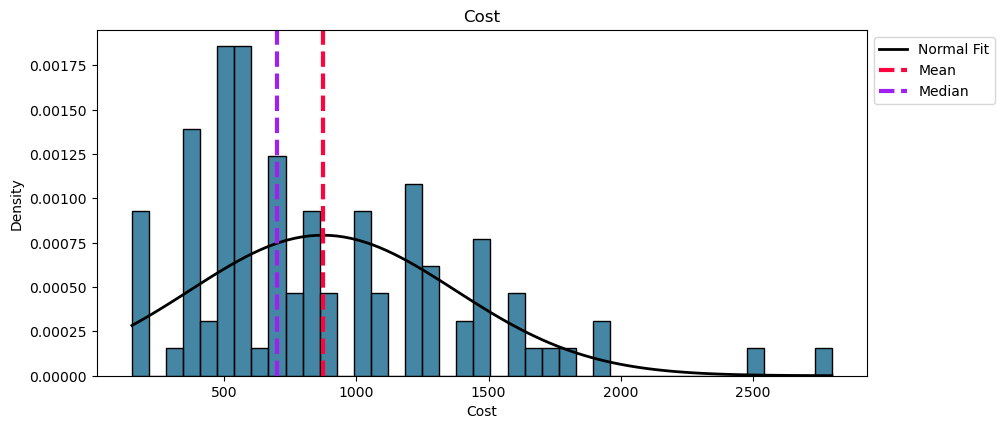

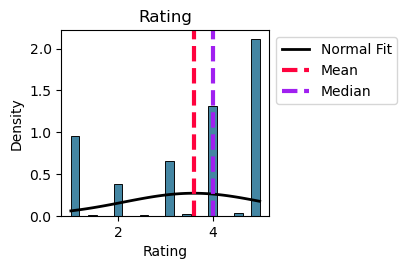

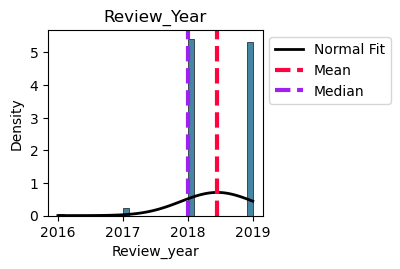

In [60]:
from scipy.stats import norm

plt.figure(figsize=(18, 8))
for i, col in enumerate(['Cost', 'Rating', 'Review_year']):
    plt.subplot(2, 2, i+1)
    
    feature = merged[col].dropna()
    sns.histplot(feature, color='#055E85', kde=False, stat='density')
    mean = feature.mean()
    std = feature.std()
    x = np.linspace(feature.min(), feature.max(), 100)
    plt.plot(x, norm.pdf(x, mean, std), color='black', linewidth=2, label='Normal Fit')
    plt.axvline(mean, color='#ff033e', linestyle='dashed', linewidth=3, label='Mean')
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3, label='Median')
    
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.title(f'{col.title()}')
    plt.tight_layout()
    plt.show()

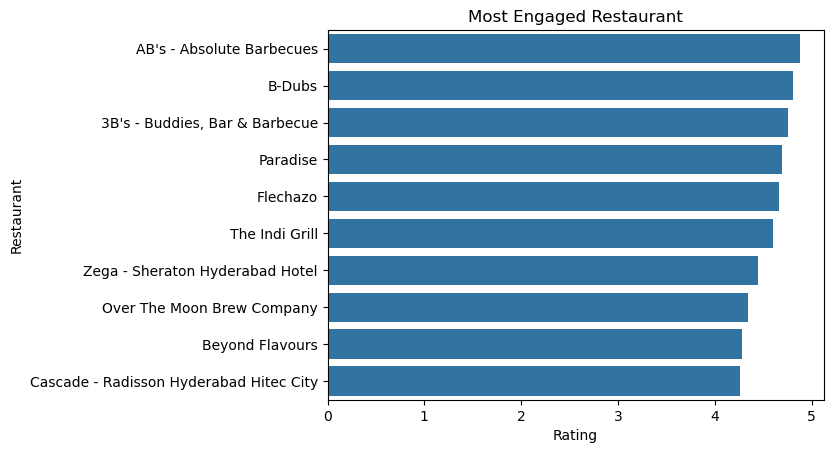

In [61]:
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

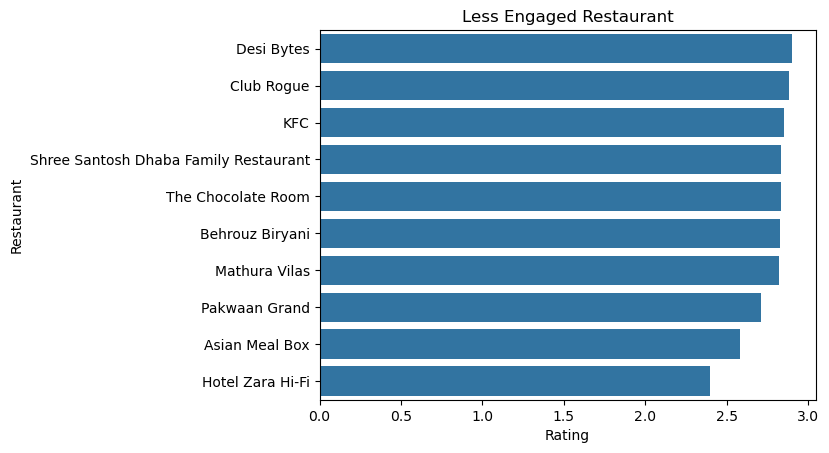

In [62]:
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less Engaged Restaurant')
plt.show()

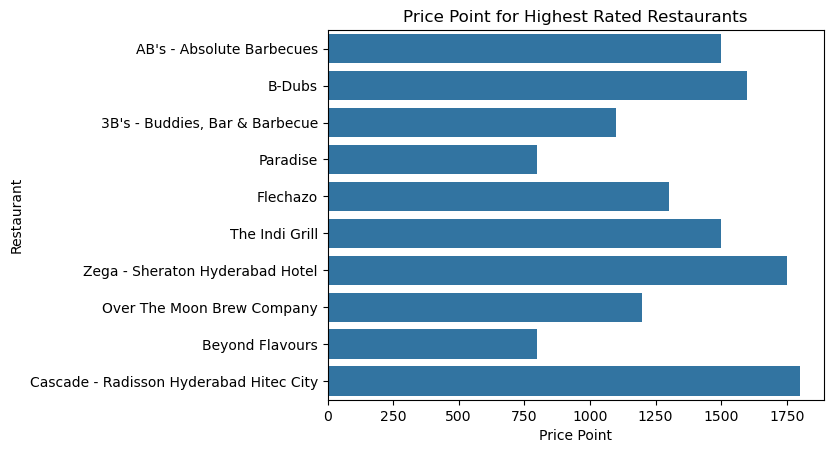

In [63]:
# price point for highest rated and lowest rated
sns.barplot(data=most_engaged_hotel[:10],x='Price Point',y='Restaurant')
plt.title('Price Point for Highest Rated Restaurants')
plt.show()

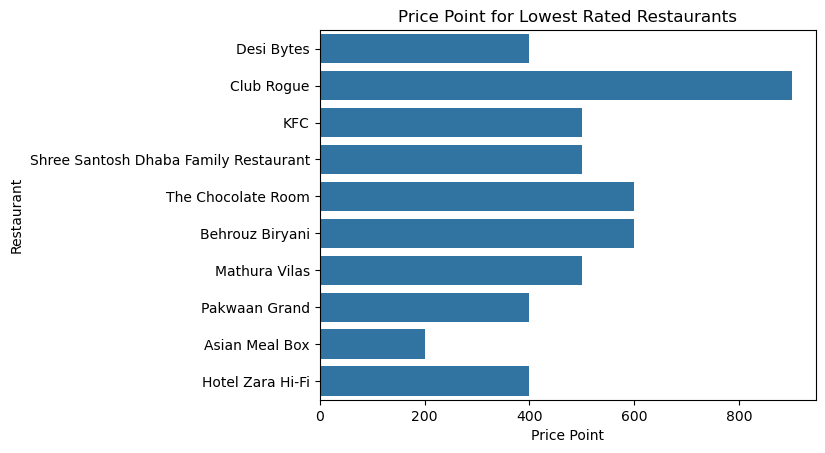

In [64]:
sns.barplot(data=most_engaged_hotel[-10:],x='Price Point',y='Restaurant')
plt.title('Price Point for Lowest Rated Restaurants')
plt.show()

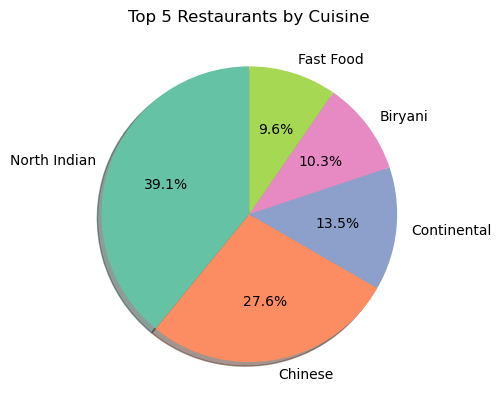

In [65]:
# list of all cusinines
cuisine_list=cuisine_df.sort_values('Number of Restaurants',ascending=False)['cuisine'].tolist()[:5]
data=cuisine_df.sort_values('Number of Restaurants',ascending=False)['Number of Restaurants'].tolist()[:5]
labels=cuisine_list
colors=sns.color_palette("Set2",len(cuisine_list))
plt.pie(data,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Top 5 Restaurants by Cuisine')
plt.show()

In [66]:
#word cloud for cuisines
plt.figure(figsize=(15,8))
text=" ".join(name for name in cuisine_df.cuisine)

word_cloud=WordCloud(background_color="black",
                     width=1000,
                     height=800,
                     colormap='Spectral',
                     collocations=False).generate(text)

plt.show()     
plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");       

<Figure size 1500x800 with 0 Axes>

In [67]:
most_followed_reviewer = review.groupby('Reviewer').agg({
    'Reviewer_total': 'max',
    'Reviewer_followers': 'max', 
    'Rating': 'mean'
}).reset_index().rename(columns = {
    'Rating': 'Average_Rating_Given'
}).sort_values('Reviewer_followers', ascending = False)

most_followed_reviewer[:5]

,Reviewer,Reviewer_total,Reviewer_followers,Average_Rating_Given
5464,Satwinder Singh,186.00,13410.00,3.67
1702,Eat_vth_me,60.00,13320.00,5.00
5236,Samar Sardar,8.00,11329.00,3.50
1788,Foodies Hyderabad,31.00,9494.00,4.50
6230,Srinivas,34.00,7628.00,3.71


In [68]:
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_total',
            y = 'Reviewer', palette='bright')
# plt.title('Reviewer given Maximum Review')
plt.show()

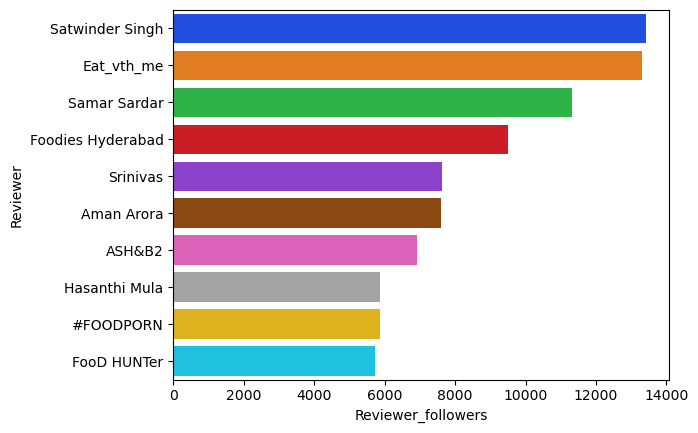

In [69]:
# most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_followers',
            y = 'Reviewer', palette='bright')
plt.show()

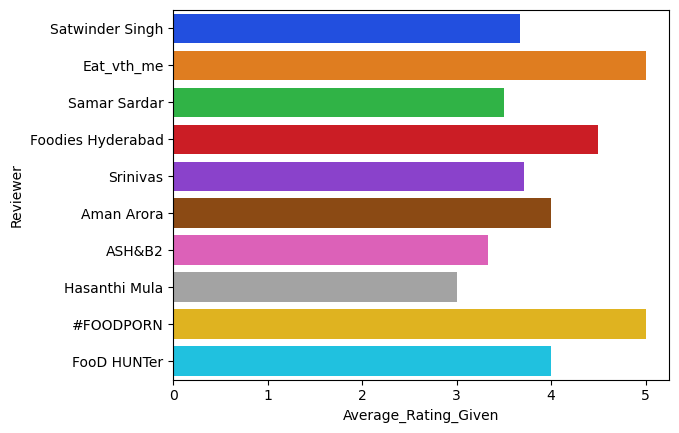

In [70]:
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given',
            y = 'Reviewer', palette='bright')
plt.show()

In [71]:
hotel.head(2)

,Restaurant,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


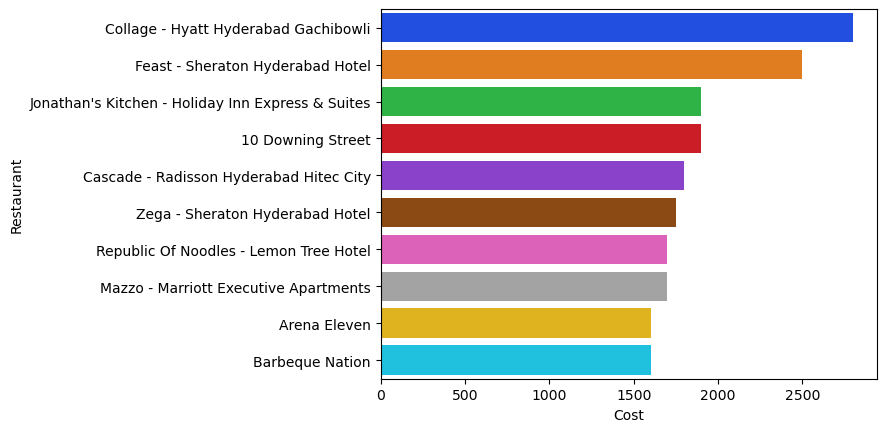

In [72]:
#top10  expensive restaurants
price_hotel=hotel.sort_values(by='Cost',ascending=False)[['Restaurant','Cost']]
sns.barplot(x='Cost',y='Restaurant',data=price_hotel[:10],palette='bright')
plt.show()

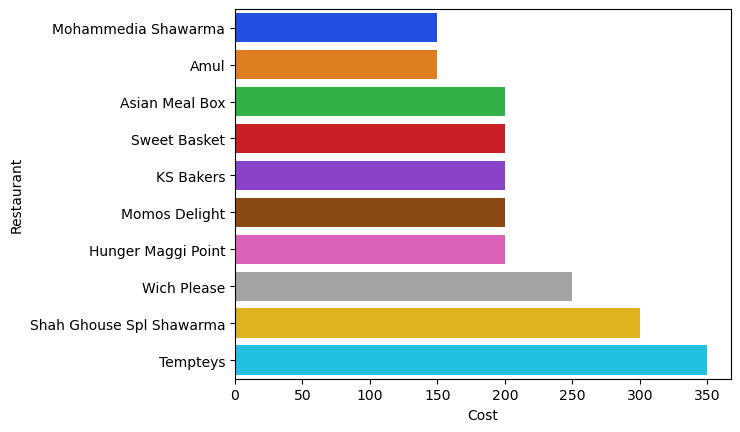

In [73]:
# top 10 lowest price restaurants
price_hotel_asc=hotel.sort_values(by='Cost',ascending=True)[['Restaurant','Cost']]
sns.barplot(x='Cost',y='Restaurant',data=price_hotel_asc[:10],palette='bright')
plt.show()

In [74]:
avg_hotel_rating.head(1)

,Restaurant,Rating,Total_Reviews
0,4.00,4.00,1


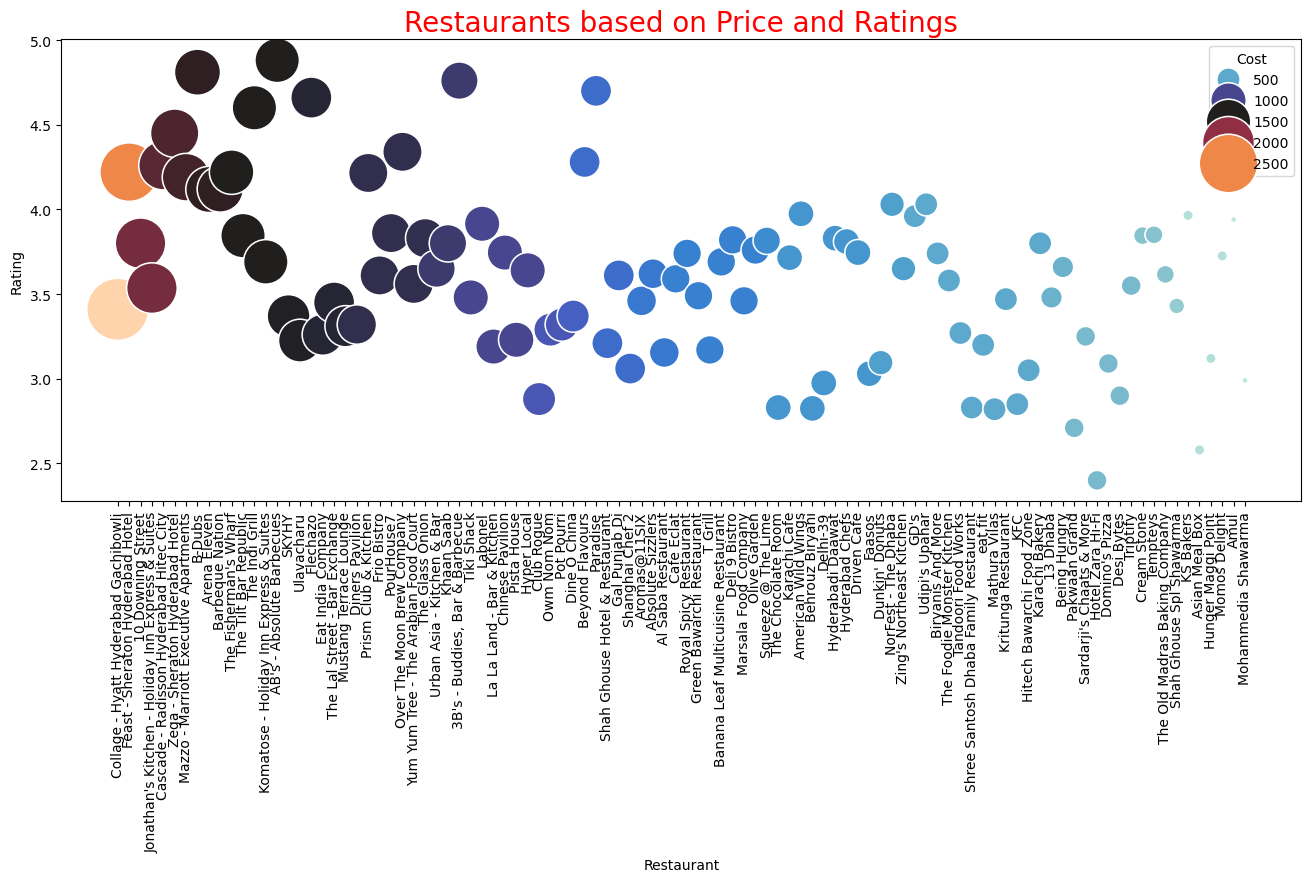

In [75]:
#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_hotel_rating.merge(hotel[['Restaurant','Cost']], on = 'Restaurant')
#chart for rating based on price and hotel
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost", 
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()

In [76]:
expected_revenue

,Restaurant,Rating,Total_Reviews,Cost
0,10 Downing Street,3.80,100,1900
1,13 Dhaba,3.48,100,450
2,"3B's - Buddies, Bar & Barbecue",4.76,100,1100
3,AB's - Absolute Barbecues,4.88,100,1500
4,Absolute Sizzlers,3.62,100,750
...,...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100,1100
96,Yum Yum Tree - The Arabian Food Court,3.56,100,1200
97,Zega - Sheraton Hyderabad Hotel,4.45,100,1750
98,Zing's Northeast Kitchen,3.65,100,550


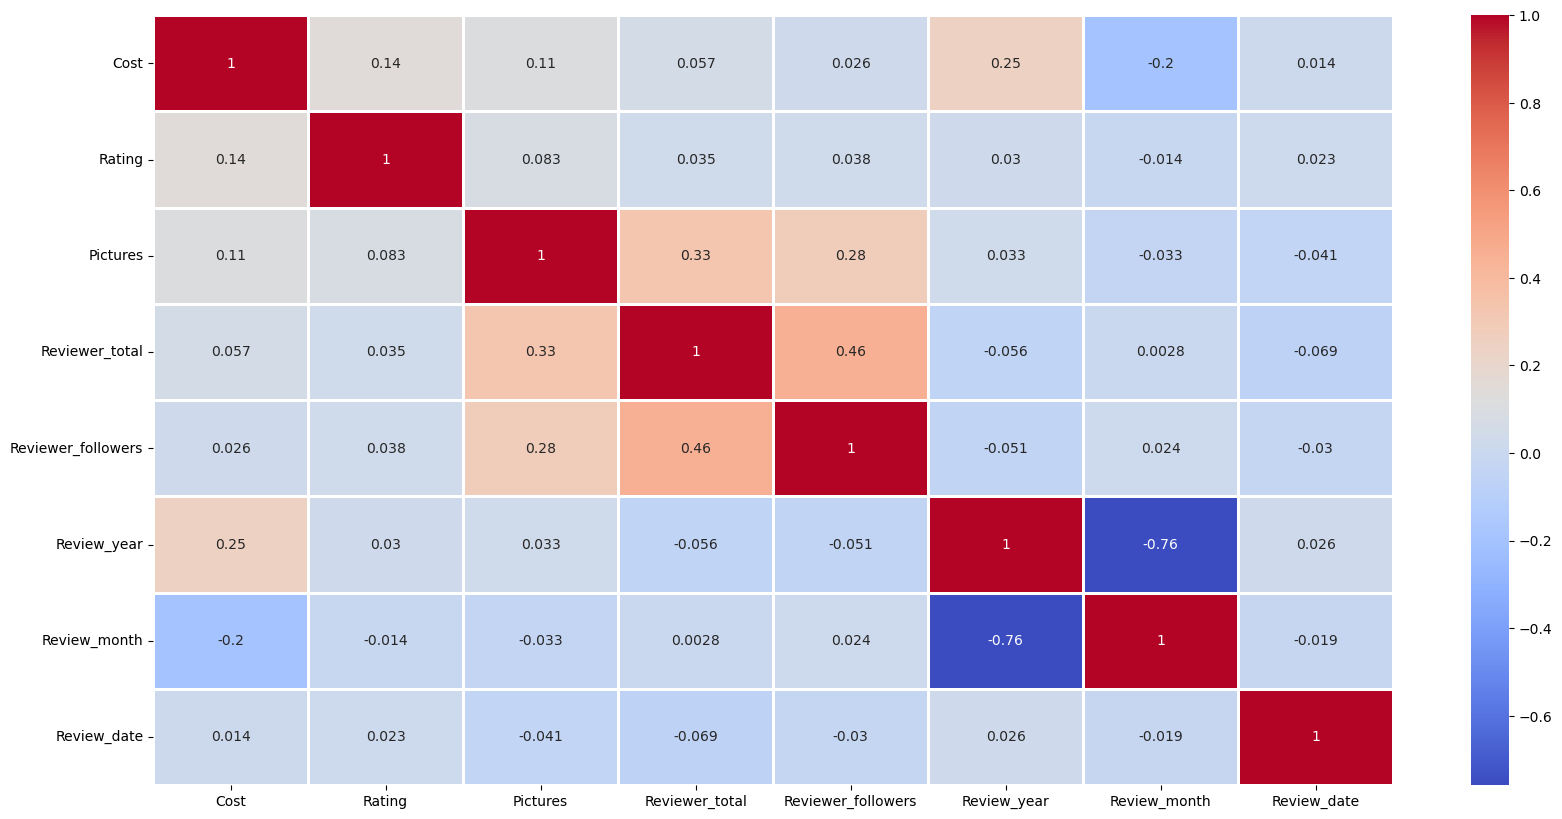

In [77]:
f, ax = plt.subplots(figsize = (20, 10))
numeric_columns = merged.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(merged[numeric_columns].corr(), ax=ax, annot=True, cmap='coolwarm', linewidths=1)
plt.show()

From the above correlation heatmap, it can be depicted that few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures.

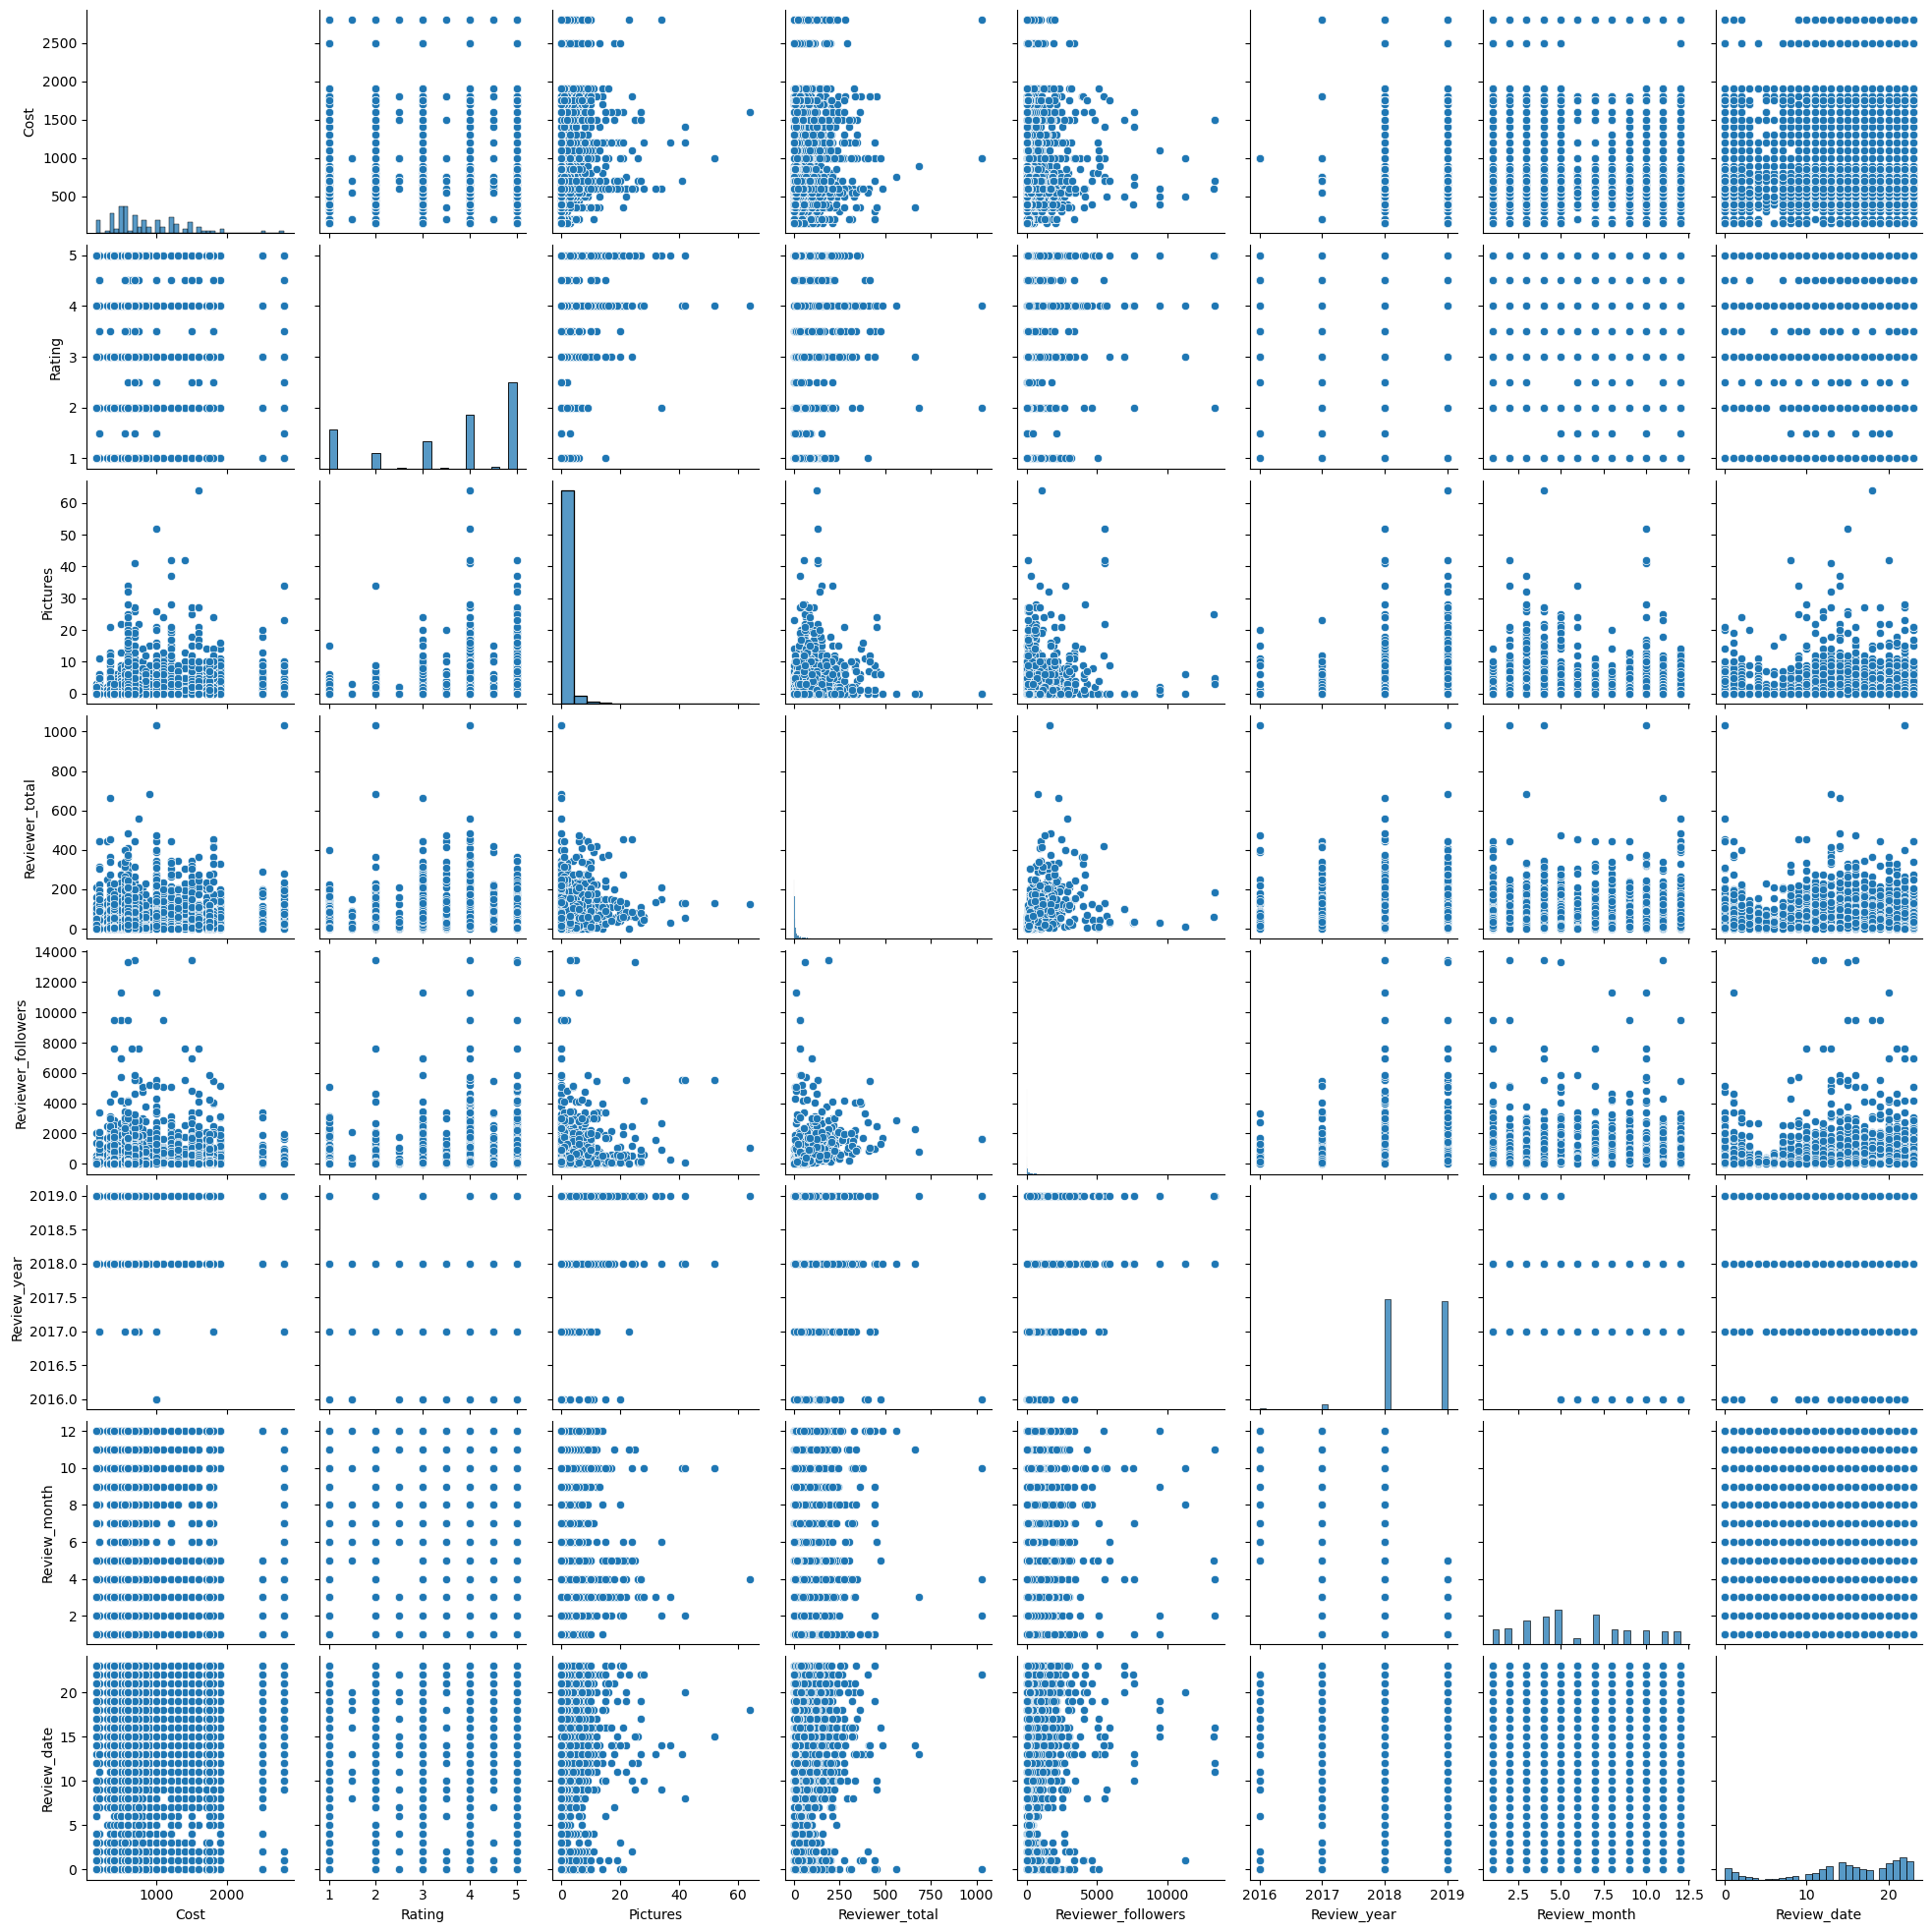

In [78]:
sns.pairplot(merged)
plt.show()

NULL Hypothesis Testing
1. The cost of a restaurant is positively correlated with the rating it receives.
2. Restaurants that are reviewed by reviewers with more followers will have a higher rating.
3. Restaurants that offer a wider variety of cuisines will have a higher rating.

Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)

Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

Test : Simple Linear Regression Analysis

In [79]:
# 1
import statsmodels.formula.api as smf
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")
     

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0)

Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)

Test : Simple Linear Regression test

In [80]:
#2
import statsmodels.formula.api as smf
model = smf.ols(formula='Rating ~ Reviewer_followers', data = merged).fit()
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)

Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
Test : Chi-Squared Test

In [81]:
from scipy.stats import chi2_contingency
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])
chi2, p, dof, expected = chi2_contingency(ct)
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


Handling missing values

In [82]:
review=review.drop_duplicates()

In [83]:
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [84]:
hotel[hotel['Timings'].isnull()]

,Restaurant,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [85]:
# filling null values with mode of timings
hotel.Timings.fillna(hotel.Timings.mode()[0], inplace = True)

In [86]:
missing_perc=(hotel['Collections'].isnull().sum()/len(hotel['Collections']))*100
print(f"Missing Percentage: {round(missing_perc,2)}%")

Missing Percentage: 51.43%


In [87]:
hotel.head(2)

,Restaurant,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [88]:
# collection is not much important here , and it has more than 50%missing values we should drop the column
hotel.drop('Collections', axis=1, inplace=True)

In [89]:
hotel.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

Reviews. Dataset

In [90]:
review.isnull().sum()

Restaurant               0
Reviewer                 2
Review                   9
Rating                   2
Metadata                 2
Time                     3
Pictures                 0
Reviewer_total           3
Reviewer_followers    1581
Review_year              3
Review_month             3
Review_date              3
dtype: int64

In [91]:
review[review['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_total,Reviewer_followers,Review_year,Review_month,Review_date
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [92]:
review[review['Reviewer_total'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_total,Reviewer_followers,Review_year,Review_month,Review_date
7601,4.00,4.00,4.00,4.00,4.00,NaT,4,NaN,NaN,NaN,NaN,NaN
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [93]:
review = review.dropna(subset=['Reviewer','Reviewer_total'])

In [94]:
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   7
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_total           0
Reviewer_followers    1578
Review_year              0
Review_month             0
Review_date              0
dtype: int64

In [95]:
#filling null values in review and reviewer follower column
review = review.fillna({"Review": "No Review", "Reviewer_followers": 0})
     

In [96]:
review.isnull().sum()


Restaurant            0
Reviewer              0
Review                0
Rating                0
Metadata              0
Time                  0
Pictures              0
Reviewer_total        0
Reviewer_followers    0
Review_year           0
Review_month          0
Review_date           0
dtype: int64

In [97]:
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9961, 16)

In [98]:
merged.isnull().sum()

Restaurant            0
Links                 0
Cost                  0
Cuisines              0
Timings               0
Reviewer              0
Review                0
Rating                0
Metadata              0
Time                  0
Pictures              0
Reviewer_total        0
Reviewer_followers    0
Review_year           0
Review_month          0
Review_date           0
dtype: int64

Handling Outliers

In [106]:
numeric_columns=['Rating','Reviewer_total','Reviewer_followers','Review_year','Review_month','Review_date','Cost']
for col in numeric_columns:
    print(f"Skewness - {col}: %f" % merged[col].skew())
    print(f"Kurtosis - {col}: %f" % merged[col].kurt())

Skewness - Rating: -0.707928
Kurtosis - Rating: -0.946219
Skewness - Reviewer_total: 5.837545
Kurtosis - Reviewer_total: 67.224151
Skewness - Reviewer_followers: 10.092703
Kurtosis - Reviewer_followers: 151.312960
Skewness - Review_year: -0.535515
Kurtosis - Review_year: 0.149214
Skewness - Review_month: 0.288755
Kurtosis - Review_month: -0.941018
Skewness - Review_date: -0.925023
Kurtosis - Review_date: 0.029897
Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590


In [107]:
review.shape

(9961, 12)

from this ratings ,Reviewer_total,Reviewer_followers,Cost are much skewed

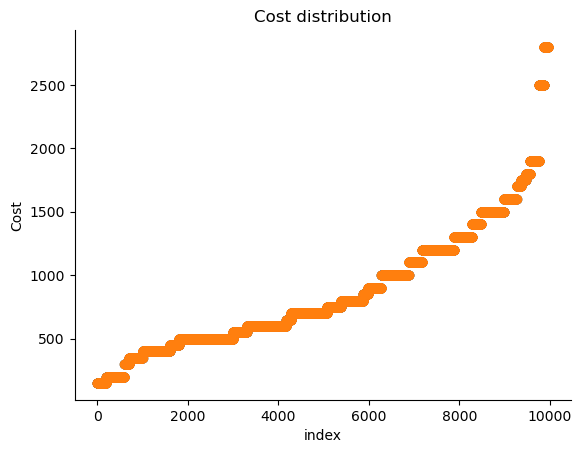

In [109]:
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()
plt.show()

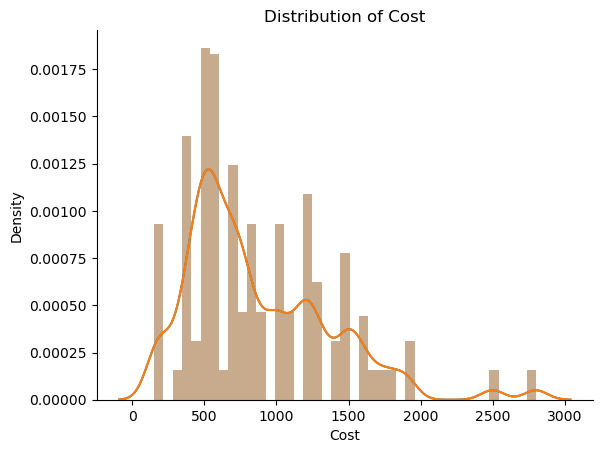

In [111]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()
plt.show()

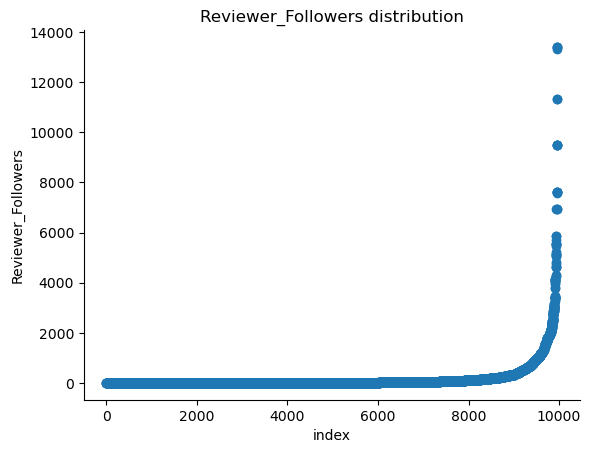

In [113]:
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()
plt.show()

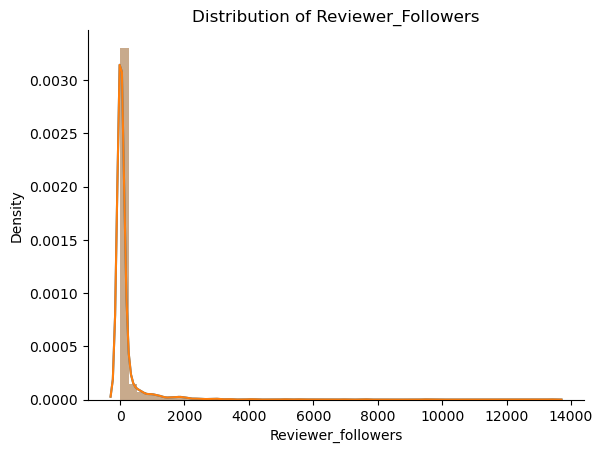

In [115]:
sns.distplot(merged['Reviewer_followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()
plt.show()

In [119]:
merged[merged['Reviewer_followers']==13410]

,Restaurant,Links,Cost,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_total,Reviewer_followers,Review_year,Review_month,Review_date
3927,Deli 9 Bistro,https://www.zomato.com/hyderabad/deli-9-bistro...,700,"Cafe, Continental, Desserts",12 Noon to 10:30 PM,Satwinder Singh,"Nice ambience, wonderful service but not so wo...",2.00,"186 Reviews , 13410 Followers",2019-02-10 12:46:00,4,186.00,13410.00,2019.00,2.00,12.00
6592,Komatose - Holiday Inn Express & Suites,https://www.zomato.com/hyderabad/komatose-holi...,1500,"North Indian, Chinese, Japanese, Sushi",1 PM to 11 PM,Satwinder Singh,Well next to Jonathans Kitchen is this place t...,5.00,"186 Reviews , 13410 Followers",2018-04-09 16:11:00,5,186.00,13410.00,2018.00,4.00,16.00
6876,The Tilt Bar Republic,https://www.zomato.com/thetiltbarrepublic,1500,"North Indian, Continental, Italian",12noon to 12midnight (Mon-Sun),Satwinder Singh,"Nice place this.\nExcellent choice in Beers, p...",4.00,"186 Reviews , 13410 Followers",2018-11-15 11:54:00,3,186.00,13410.00,2018.00,11.00,11.00


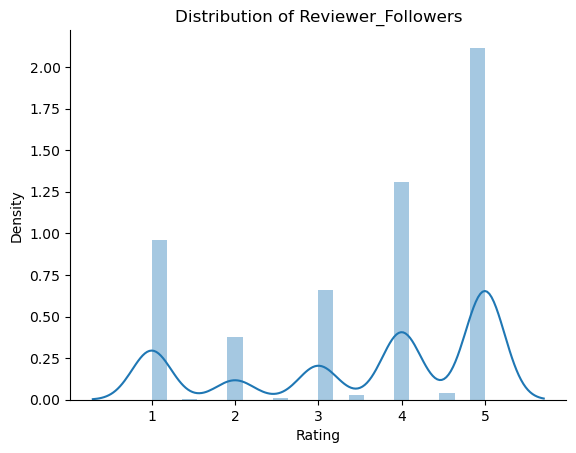

In [121]:
sns.distplot(merged['Rating'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()
plt.show()

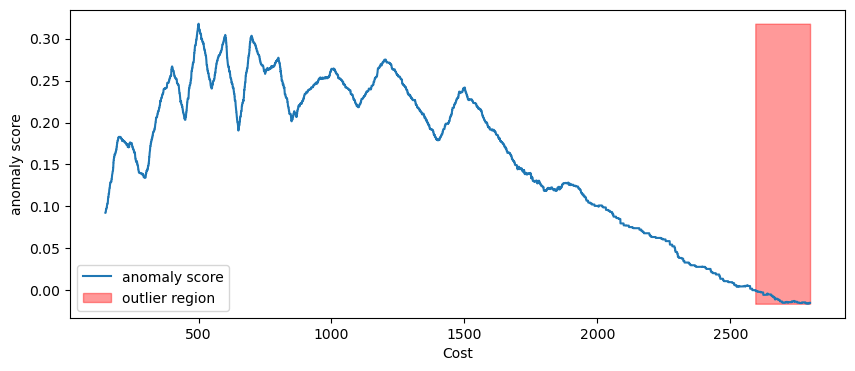

In [122]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show()

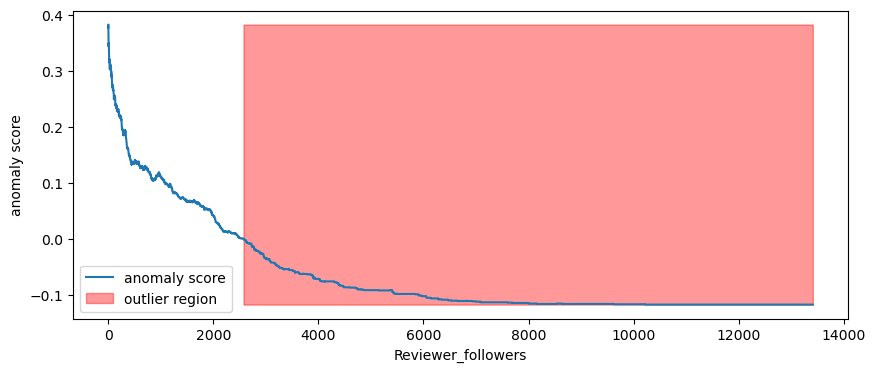

In [124]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_followers'].values.reshape(-1, 1))


xx = np.linspace(merged['Reviewer_followers'].min(), merged['Reviewer_followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_followers')
plt.show();

In [127]:
merged[merged['outlier_univariate_follower']==-1].head()

,Restaurant,Links,Cost,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_total,Reviewer_followers,Review_year,Review_month,Review_date,anomaly_score_univariate_Cost,outlier_univariate_Cost,anomaly_score_univariate_follower,outlier_univariate_follower
68,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Gautam Dev,Second time being here it's really beyond imag...,5.00,"47 Reviews , 4734 Followers",2019-05-15 00:07:00,8,47.00,4734.00,2019.00,5.00,0.00,0.28,1,-0.09,-1
310,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,Dinesh Jana,Its a worst thing happened with me.we ordered ...,1.00,"5 Reviews , 5083 Followers",2019-05-19 23:08:00,0,5.00,5083.00,2019.00,5.00,23.00,0.28,1,-0.09,-1
635,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,ASH&B2,"Dal tadka awesome rajma chawal so-so, too garl...",4.00,"98 Reviews , 6931 Followers",2019-04-07 22:27:00,0,98.00,6931.00,2019.00,4.00,22.00,0.32,1,-0.11,-1
1071,Sardarji's Chaats & More,https://www.zomato.com/hyderabad/sardarjis-cha...,400,"Street Food, North Indian, Fast Food","12 Noon to 3:30 PM, 7 PM to 10:30 PM",Aman Arora,Ordered via Zomato delivery. Great taste and p...,4.00,"30 Reviews , 7589 Followers",2018-10-31 22:33:00,0,30.00,7589.00,2018.00,10.00,22.00,0.27,1,-0.11,-1
1095,Sardarji's Chaats & More,https://www.zomato.com/hyderabad/sardarjis-cha...,400,"Street Food, North Indian, Fast Food","12 Noon to 3:30 PM, 7 PM to 10:30 PM",Varun Reddy,Heard a lot about this small food joint and th...,2.00,"125 Reviews , 4642 Followers",2018-09-16 21:07:00,0,125.00,4642.00,2018.00,9.00,21.00,0.27,1,-0.09,-1


Treating Outliers

In [133]:
import numpy as np

symmetric_feature = []
non_symmetric_feature = []
numeric_cols = merged.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if abs(merged[col].mean() - merged[col].median()) < 0.2:
        symmetric_feature.append(col)
    else:
        non_symmetric_feature.append(col)

print("Symmetric Distributed Features : -", symmetric_feature)
print("Skew Symmetric Distributed Features : -", non_symmetric_feature)


Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_total', 'Reviewer_followers', 'Review_year', 'Review_month', 'Review_date']
